In [1]:
import torch

In [3]:
inputs=torch.tensor(
    [[0.43,0.15,0.89],#your
     [0.55,0.87,0.66],#journey
     [0.57,0.85,0.64],#starts
     [0.22,0.58,0.33],#with
     [0.77,0.25,0.10],#one
     [0.05,0.80,0.55]]#step
)

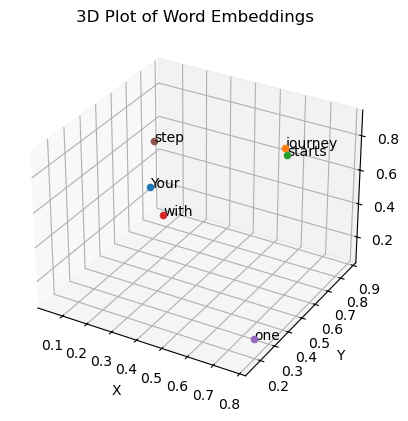

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

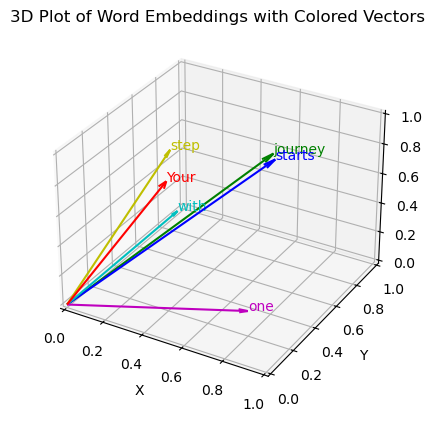

In [7]:
# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()


### we use dot product to find the attention score


In [11]:
query=inputs[1]

attn_score_2=torch.empty(inputs.shape[0])
for i,x_i in enumerate(inputs):
    attn_score_2[i]=torch.dot(x_i,query)

print(attn_score_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


### next we normalise each of the attention score that we compiuted previously
important to improve interpretability and simplify the computation

In [17]:
normal_attn_score_2=attn_score_2/attn_score_2.sum()
print(normal_attn_score_2,"sum:", normal_attn_score_2.sum())

tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656]) sum: tensor(1.0000)


we'll use softax for better values when we use large lanuage models

In [24]:
def naive_softmax(x):
    return torch.exp(x)/torch.exp(x).sum(dim=0)

attn_weights_2_naive=naive_softmax(attn_score_2)

print("attention_wwights:" ,attn_weights_2_naive)
print("Sum:",attn_weights_2_naive.sum())

attention_wwights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


### now we'll se the pytorch implementation of sotmax which provide stable computation

In [31]:
attn_weights_2=torch.softmax(attn_score_2,dim=0)
print(attn_weights_2)
print(attn_weights_2.sum())

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
tensor(1.)


it is same as previous one becoz we dont have any very large or small values in our query

## now we generate the  context vector

In [35]:
attn_scores=torch.empty(6,6)

for i,x_i in enumerate(inputs):
    for j,x_j in enumerate(inputs):
        attn_scores[i,j]=torch.dot(x_i,x_j)

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


##### for loops are generally very slow so we need same result sfrom matrix multiplication

In [38]:
attn_scores=inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


#### now normalisation

In [43]:
attn_weights=torch.softmax(attn_scores, dim=-1) ##dimparameter is -1 becoz we are instructing the softmax functio n to apply the nirmalisation along the last dimention of the sttn_score tensor(which is the columns)
print(attn_weights)


tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


#### calculating the context vectors

In [54]:
all_context_vectors=attn_weights @ inputs
print("inputs tokens were:\n", inputs)
print("ans the context tokens are:\n ", all_context_vectors)

inputs tokens were:
 tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])
ans the context tokens are:
  tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])
